In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


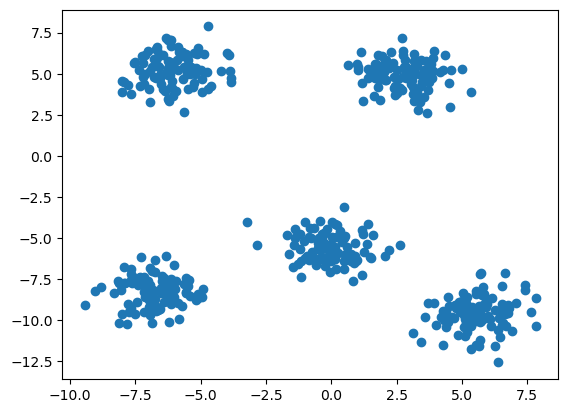

In [59]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of data points and the number of clusters
n_samples = 500
n_clusters = 5

# Generate the data
# X = np.random.randn(n_samples, 2)
# X[:100] += np.array([3, 3])
# X[100:200] += np.array([3, -3])
# X[200:300] += np.array([-3, 3])
# X[300:400] += np.array([-3, -3])
# X[400:] += np.array([0, 6])
X, _ = make_blobs(n_samples=500, centers=5, random_state=10)
# Visualize the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [3]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
kmeans.cluster_centers_


array([[-6.78567723, -8.26282547],
       [ 2.78561142,  4.93182424],
       [-0.06909909, -5.56399319],
       [-6.06533341,  5.2400571 ],
       [ 5.56873506, -9.60861515]])

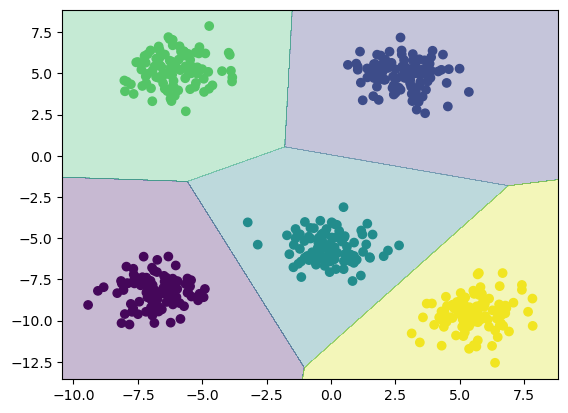

In [5]:
labels = kmeans.predict(X)

# Create a mesh grid that covers the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster labels for each point on the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points using their predicted cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Plot the decision boundaries using the predicted labels for the mesh grid points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()


In [95]:
import numpy as np
import random

# Définition de la fonction de distance euclidienne
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Fonction pour initialiser les centroides de manière aléatoire
# on defini aléatoirement le centroid en se basant sur les données tirées de manière random
def initialize_centroids(data, k):
    centroids = data.copy()#copy des données
    np.random.shuffle(centroids)#radomise les données
    return centroids[:k]#on prend les k premières données randomisées

# Fonction pour trouver le centroïde le plus proche pour chaque point
def closest_centroid(point, centroids):
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    #on calcul la distances d'un point avec les controid et on choisi 
    #la plus petite distance avec argmin de numpy
    return np.argmin(distances)

# Implémentation de l'algorithme k-means
#on fait 100 et on prend une tolerance a 10e-4
def kmeans_run(data, k, max_iterations=100000, tolerance=1e-4): 
    """
    fonction qui fait kmeans a completer
    *
    
    
    """
    #on commence par initialisé les centroids de manière aléatoire
    centroids = initialize_centroids(data, k) #on appel la fonction initialize_centroids
    prev_centroids = centroids.copy()#on creer une copie de la position des centroid 
                                    # pour verifier par la suite la convergence des centroid
    labels = np.zeros(len(data),dtype=int)  # Creer un array vide pour stocker les labels   
    # Boucle principale 
    for iter_ in range(max_iterations):#boucle sur le nombre d'iteration
        clusters = [[] for iter_ in range(k)] #on crée un groupe de k cluster vide

        # Assigner chaque point au centroïde le plus proche
        for i,point in enumerate(data): #pour chaque observation du jeu de données
            
            centroid_idx = closest_centroid(point, centroids) #on appel la fonction closest centroid 
            #pour chaque point de data
            clusters[centroid_idx].append(point)#on ajoute le point dans la liste vide du 
            #cluster trouvé avec closest centroid (on utilise l'index du centroid pour cela)
            labels[i] = centroid_idx  # on ajoute les label dans le même orbre que les points 
            #et les centroids
            #changer cette partie, => vecteur entier
            
        # Mettre à jour les positions des centroides
        for i, cluster in enumerate(clusters): # pour chaque cluster on recupère l'index 
                                                # et le cluster
            centroids[i] = np.mean(cluster, axis=0) #on met a jour les centroid en faisant 
                                                    #la moyenne des cluster

        # Vérifier si les centroides ont suffisamment convergé
        centroid_shift = np.array([euclidean_distance(prev, curr) for prev, curr in zip(prev_centroids, centroids)])
#         centroid_shift = np.sum([euclidean_distance(prev, curr) for prev, curr in zip(prev_centroids, centroids)])
        
        #centroid shift contient la somme ddes distances entre les position précédente et les positions
        #actuels des centroid. pour cela on Zip ensemble la pposition actuels et précedente d'un centroid
        #puis on calcul la distance euclienne entre ces deux position
        #on fait cela pour toute les paires de positions des centroid et si al somme et inférieur
        #a la valeur de tolérance, cela veut dire que tout les centroid sont a la "bonne place"
        if np.all(centroid_shift <= tolerance): #on peut donc sortir de la boucle d'iteraction
                break
#         if centroid_shift <= tolerance: #on peut donc sortir de la boucle d'iteraction
#             break
        
        prev_centroids = centroids.copy()#sinon on garde en mémoire la position des centroid 
        #et on refait une itération

    return centroids, clusters,labels # la fonction nous renvoi les clusters et les centroids

### def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [25]:
euclidean_distance(5,2)

3.0

In [26]:
def initialize_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [81]:
X, _ = make_blobs(n_samples=1000, centers=5, random_state=10)

In [34]:
centro= initialize_centroids(X, 5)
centro

array([[-0.66582897, -4.39456186],
       [-0.73447976, -5.85782982],
       [ 2.09804703,  4.61590652],
       [ 3.11132994,  4.19373446],
       [ 0.11280954, -6.28810265]])

In [38]:
def closest_centroid(point, centroids):
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    return np.argmin(distances)

In [41]:
closest_centroid(-3, centro)

0

In [57]:
for iter_ in range(100):
    clusters = [[] for iter_ in range(k)]
clusters

[[], [], [], [], []]

In [55]:

len(X)

500

In [58]:
for point in X: 
    centroid_idx = closest_centroid(point, centro)    
    clusters[centroid_idx].append(point)
len(clusters[3])

51

In [60]:
prev_centroids = centro.copy()
for i, cluster in enumerate(clusters):
    centro[i] = np.mean(cluster, axis=0) 
centroid_shift = np.sum([euclidean_distance(prev, curr) for prev, curr in zip(prev_centroids, centro)])

centroid_shift


16.214074731551815

In [126]:
centroids,clusters,labels = kmeans_run(X, 5, max_iterations=100000, tolerance=1e-4)
clusters

[[array([1.12565931, 6.32088416]),
  array([3.20718966, 4.98017969]),
  array([0.98099677, 5.59252857]),
  array([2.76872794, 5.42509938]),
  array([4.99209202, 5.28474532]),
  array([2.88029427, 4.83101311]),
  array([3.1768916 , 5.16440887]),
  array([1.41137496, 4.75681739]),
  array([1.95034397, 5.06021721]),
  array([1.93113986, 6.08165279]),
  array([1.40314511, 5.29946758]),
  array([3.04827025, 4.89216241]),
  array([4.34704024, 6.13980135]),
  array([2.40646283, 4.80478485]),
  array([2.27149188, 6.31825694]),
  array([3.94265598, 6.37341563]),
  array([2.86590068, 4.98010256]),
  array([4.16118309, 5.11632452]),
  array([3.89014626, 5.15872503]),
  array([2.08850954, 5.57809992]),
  array([2.34976347, 5.64022326]),
  array([1.73225492, 4.92248315]),
  array([4.28442199, 5.21541692]),
  array([2.74176617, 6.38814196]),
  array([3.56552873, 4.98710035]),
  array([1.66639614, 4.71854403]),
  array([2.09804703, 4.61590652]),
  array([1.03802056, 5.41101493]),
  array([2.00094126,

In [123]:
centroids

array([[  5.14536245, -10.06504439],
       [ -6.78567723,  -8.26282547],
       [ -0.06909909,  -5.56399319],
       [ -1.639861  ,   5.08594067],
       [  6.32139746,  -8.79718539]])

In [102]:
labels

array([2, 3, 0, 2, 1, 0, 2, 0, 0, 4, 0, 0, 3, 1, 4, 3, 4, 0, 0, 2, 0, 2,
       0, 2, 4, 2, 4, 3, 2, 2, 1, 1, 4, 1, 0, 0, 0, 4, 1, 0, 2, 2, 1, 0,
       1, 0, 2, 0, 3, 2, 4, 2, 0, 4, 0, 0, 3, 0, 1, 3, 3, 0, 0, 0, 2, 4,
       2, 0, 2, 4, 4, 0, 0, 0, 2, 2, 4, 0, 0, 1, 0, 1, 2, 0, 2, 0, 3, 4,
       0, 3, 1, 0, 2, 1, 0, 0, 1, 2, 1, 4, 2, 4, 4, 4, 0, 1, 2, 0, 0, 1,
       4, 0, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,
       4, 3, 0, 0, 0, 1, 2, 4, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       4, 2, 4, 3, 4, 2, 1, 1, 3, 4, 1, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 4,
       2, 0, 0, 3, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 1, 4, 4, 0, 4, 2,
       0, 1, 2, 4, 4, 1, 3, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 4, 0, 4,
       3, 0, 1, 4, 2, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 0, 2, 2, 4, 3,
       0, 0, 0, 1, 1, 2, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 2, 0, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 4, 3, 4, 1, 0, 4, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 0, 4, 1, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0,

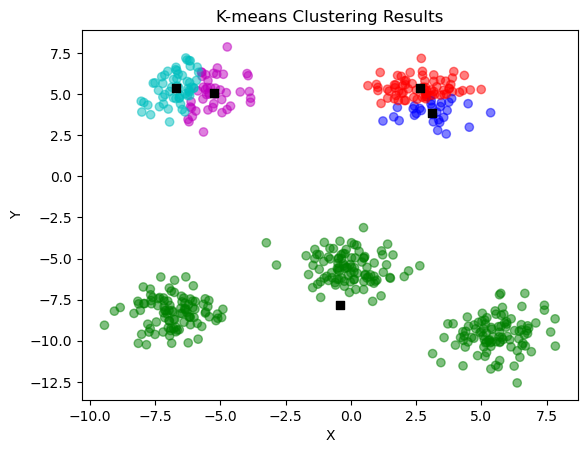

In [127]:
import matplotlib.pyplot as plt
#labels = kmeans.predict(X) #il faut trouver un moyen de faire ça dans la fonction !!!!!

colors = ["r", "g", "b", "c", "m", "y", "k"]


label_colors = [colors[label] for label in labels]

plt.scatter(X[:, 0], X[:, 1], c=label_colors, alpha=0.5)

for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], marker="s", c="k")

plt.title("K-means Clustering Results")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [10]:
import pandas as pd
df = pd.read_csv('/home/elie.poncet@Digital-Grenoble.local/Documents/ML2/ML2.3 - Intro to clustering-20230503T080929Z-001/ML2.3 - Intro to clustering/data/bank-full.csv',sep=';')   

In [12]:
numerical_features = ['age','balance','duration', 'pdays','previous', 'campaign']

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
ohot_encoder = OneHotEncoder(sparse=False)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.compose import ColumnTransformer

# cat_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="constant")),
#     ('ohe',OneHotEncoder(handle_unknown='ignore', sparse=False)
# )
# ])

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="mean")),
     ('std_scaler', StandardScaler()), # try commenting in this line and running fit_transform with and without it
 ])


full_pipeline = ColumnTransformer(transformers=[
 ("num", num_pipeline, numerical_features),
#  ("cat", cat_pipeline, categorical_features),
 ])

NameError: name 'df2' is not defined

In [15]:
df2 = df[['age', 'balance',
        'duration', 'campaign', 'pdays',
       'previous','y']]

In [27]:
df2

,age,balance,duration,campaign,pdays,previous,y
0,58,2143,261,1,-1,0,no
1,44,29,151,1,-1,0,no
2,33,2,76,1,-1,0,no
3,47,1506,92,1,-1,0,no
4,33,1,198,1,-1,0,no
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes
45207,71,1729,456,2,-1,0,yes
45208,72,5715,1127,5,184,3,yes
45209,57,668,508,4,-1,0,no


In [28]:
y= df2.pop('y')

In [35]:
df2

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [33]:
df_transformed = full_pipeline.fit_transform(df2)

In [34]:
df_transformed

array([[ 1.60696496,  0.25641925,  0.0110161 , -0.41145311, -0.25194037,
        -0.56935064],
       [ 0.28852927, -0.43789469, -0.41612696, -0.41145311, -0.25194037,
        -0.56935064],
       [-0.74738448, -0.44676247, -0.70736086, -0.41145311, -0.25194037,
        -0.56935064],
       ...,
       [ 2.92540065,  1.42959305,  3.37379688,  1.43618859,  1.05047333,
         0.72181052],
       [ 1.51279098, -0.22802402,  0.97014641, -0.41145311, -0.25194037,
         0.39902023],
       [-0.37068857,  0.52836436,  0.39932797,  1.4761376 ,  4.52357654,
        -0.24656035]])

In [31]:
centroids,clusters = kmeans_run(df_transformed, 5, max_iterations=1000, tolerance=1e-4)
clusters

[[array([-0.74738448, -0.15773869, -0.85103625,  1.10660926,  1.05047333,
         -0.56935064]),
  array([ 0.10018132, -0.52854306,  1.01286072,  1.25641805,  0.18219753,
         -0.56935064]),
  array([-0.74738448,  0.68371464, -0.44330879,  0.50737411,  1.48461123,
         -0.56935064]),
  array([-0.46486255,  0.34575388, -0.71901021,  0.45743785,  1.48461123,
         -0.56935064]),
  array([-0.46486255, -0.44741934, -0.45884126,  1.02671124,  1.05047333,
         -0.56935064]),
  array([-1.40660233, -0.39092833, -0.92093239,  0.99674948,  1.48461123,
         -0.56935064]),
  array([ 0.94774711,  0.58124257,  0.74104241,  1.35629057,  0.18219753,
         -0.56935064]),
  array([-0.74738448, -0.11734105, -0.32293211,  1.33631606,  0.61633543,
         -0.56935064]),
  array([-0.65321051, -0.15215527, -0.55980235,  1.29636706,  1.05047333,
         -0.56935064]),
  array([-1.02990642, -0.16069461, -0.54038676,  1.2664053 ,  1.05047333,
         -0.56935064]),
  array([-1.02990642

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=6)
pca.fit(df_transformed)
df_pca = pca.transform(df_transformed)




In [38]:
df_pca

array([[-0.39344908,  1.33724358],
       [-0.39103018, -0.065795  ],
       [-0.37113171, -0.79650215],
       ...,
       [ 1.66729527,  3.52660215],
       [-0.55311955,  1.01087375],
       [ 4.23067809,  0.07086432]])

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


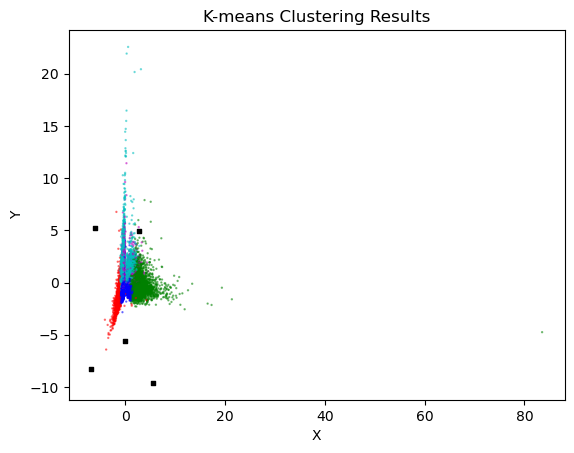

In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df_transformed)
labels = kmeans.predict(df_transformed) #il faut trouver un moyen de faire ça dans la fonction !!!!!

colors = ["r", "g", "b", "c", "m", "y", "k"]


label_colors = [colors[label] for label in labels]

plt.scatter(df_pca[:, 0], df_pca[:, 1],s=0.5, c=label_colors, alpha=0.5)

for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1],s=10,marker="s", c="k")

plt.title("K-means Clustering Results")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()